<a href="https://colab.research.google.com/github/Gabriel1Vitor/boston2/blob/main/final_model_bost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error 
x_train=pd.read_csv("/content/drive/MyDrive/paranuvem/train1")
x_test= pd.read_csv("/content/drive/MyDrive/paranuvem/test1")
y_train=pd.read_csv("/content/drive/MyDrive/bost/ytr.csv")
y_test=pd.read_csv("/content/drive/MyDrive/bost/yts.csv")

In [ ]:
id=x_test["Id"]
x_train=x_train.drop(columns=["Unnamed..0","Id","Unnamed: 0","SalePrice"])
x_test=x_test.drop(columns=["Unnamed..0","Id","Unnamed: 0"])

y_train=y_train["x"]
y_test=y_test["SalePrice"]

In [ ]:
xgbc=XGBClassifier(learning_rate=0.001,random_state=20,n_estimators=50)
xgbc.fit(x_train,y_train)

XGBClassifier(learning_rate=0.001, n_estimators=50, objective='multi:softprob',
              random_state=20)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

In [ ]:

model =CatBoostClassifier (iterations=50,
                           learning_rate=0.1,random_state=45,gpu_cat_features_storage=True)

model.fit( x_train, y_train)

0:	learn: 6.4538393	total: 9.37s	remaining: 7m 39s
1:	learn: 6.4119491	total: 18.3s	remaining: 7m 20s
2:	learn: 6.3700351	total: 25.4s	remaining: 6m 38s
3:	learn: 6.3274780	total: 29.9s	remaining: 5m 43s
4:	learn: 6.2895981	total: 34.8s	remaining: 5m 13s
5:	learn: 6.2524966	total: 39.7s	remaining: 4m 51s
6:	learn: 6.2151779	total: 44.2s	remaining: 4m 31s
7:	learn: 6.1744064	total: 48.8s	remaining: 4m 15s
8:	learn: 6.1343007	total: 53.5s	remaining: 4m 3s
9:	learn: 6.0979647	total: 58.5s	remaining: 3m 54s
10:	learn: 6.0568379	total: 1m 3s	remaining: 3m 43s
11:	learn: 6.0237329	total: 1m 7s	remaining: 3m 34s
12:	learn: 5.9832096	total: 1m 12s	remaining: 3m 25s
13:	learn: 5.9472882	total: 1m 17s	remaining: 3m 18s
14:	learn: 5.9115596	total: 1m 21s	remaining: 3m 10s
15:	learn: 5.8763508	total: 1m 26s	remaining: 3m 3s
16:	learn: 5.8382554	total: 1m 30s	remaining: 2m 56s
17:	learn: 5.8023677	total: 1m 35s	remaining: 2m 49s
18:	learn: 5.7688363	total: 1m 39s	remaining: 2m 42s
19:	learn: 5.7347

In [ ]:
catpre=model.predict(x_test)

In [ ]:
predc=xgbc.predict(x_test)

In [ ]:
mean_absolute_error(y_test,predc)

36179.73424715311

In [ ]:
mean_absolute_error(y_test,catpre)

37412.54189722738

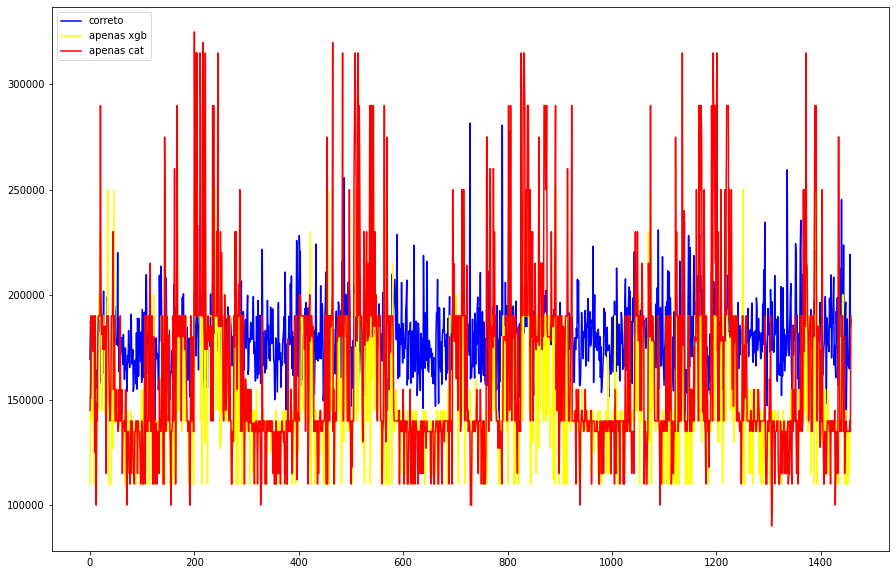

In [ ]:
import matplotlib.pyplot as plt
import pylab as pl
pl.figure(figsize=(15,10))
plt.plot(y_test,color="blue",label="correto")
plt.plot(predc,color="yellow",label="apenas xgb")
plt.plot(catpre,color="red",label="apenas cat")
plt.legend()
plt.show()

In [ ]:
precat=pd.DataFrame(catpre)

In [ ]:
my_submission=pd.DataFrame()
my_submission["SalePrice"]=precat
my_submission["Id"]=id
filename = "submission.csv"
my_submission .to_csv(filename,index=False)
print("Saved file: " + filename)

Saved file: submission.csv
